# Multiple Linear Regression

## Introduction
<p>Usually Linear Regression is a simple but effective model that finds a wide range of uses. As the name suggests a linear regression model assumes linearity in its inputs. The main use for it is to model the relationship between a scalar response (or dependent variable) $y$ and one or more explanatory variables (or independent variables) $x_1,x_2,..x_n$. In the case of one explanatory variable the model is called *Simple Linear Regression*. For more than one explanatory variable, the process is called *Multiple Linear Regression*.</p>
Theoretically speaking,  the conditional mean of the response given the values of the explanatory variables (or predictors) is assumed to be an affine function of those values — $E(Y|X) = f(X)$ , where $X$ the dataset in matrix form ( also known as the design matrix) with m rows for the observations and n dimentions for the feature columns. Knowing that, we can define a regression problem that looks like this:
$$y = f(X)+ \epsilon$$
where $x\in \mathbb{R}^n$ are inputs and $y\in \mathbb{R}$ are the observed function values. <br>




The model itself has the form 
\begin{align}
y & = f(X) + \epsilon\\
  & = 1\theta_0+x_{i1}\theta_1+...+x_{ij}\theta_m+\epsilon,\quad\quad \text{ $i = 1,2,...,m$}\\
  & =X\theta + \epsilon
\end{align}
where the response variable is 
$\begin{pmatrix}y_1 \\ y_2 \\ \vdots\\y_m\end{pmatrix}$,
the dataset is the matrix $X = 
\begin{pmatrix}
x_1^T \\ x_2^T\\ \vdots \\x_m^T 
\end{pmatrix} 
= \begin{pmatrix}
1&x_{11}&\cdots & x_{1n}  \\ 
1&x_{21}&\cdots & x_{2n}\\
\vdots&\vdots&\ddots&\vdots\\
1&x_{m1}&\cdots & x_{mn} 
\end{pmatrix}$,<br>
the parameter vector is $\theta = \begin{pmatrix}\theta_0 \\ \theta_1 \\ \vdots \\\theta_m\end{pmatrix}$ and the error vector is $\epsilon = \begin{pmatrix}\epsilon_1 \\\epsilon_2 \\ \vdots\\\epsilon_m\end{pmatrix}$ .

In order to find the best parameter vector $\theta$ that fits closest to the original $y$ we need to minimize a loss function. This function would be the *Sum of Squared Errors* (*SSE*) which is often denoted as $\mathcal{L}$ and defined as 

\begin{align}
\mathcal{L}(\theta) & = \sum_{i=1}^n (y_i - x_i^T\theta)^2 \\
& = (y - X\theta)^T(y - X\theta) = (y^T-\theta^TX^T)(y-X\theta)
\end{align}

We want to minimize this function and we do so by setting the derivative to zero and algebraicly getting a solution. This method is also known as the Least Squares Solution.

\begin{align}
\frac{d\mathcal{L}}{d \theta} & = \frac{d}{d\theta}(y^Ty - \theta^TX^Ty - y^TX\theta +\theta^TX^T X\theta) = 0 
\end{align}

\begin{align}
-X^Ty- X^Ty + 2X^TX\theta = 2X^TX\theta-2X^Ty = 0
\end{align}

\begin{align}
2X^TX\theta = 2X^Ty
\end{align}

\begin{align}
X^TX\theta = X^Ty
\end{align}

\begin{align}
(X^TX)^{-1} X^TX\theta = (X^TX)^{-1} X^Ty
\end{align}

\begin{align}
\theta = (X^TX)^{-1} X^Ty
\end{align}

\begin{align}
\hat{y}=X\theta=X(X^TX)^{-1}X^Ty
\end{align}

\begin{align}
Var(\theta) & = Var((X^TX)^{-1} X^Ty) \\
& = (X^TX)^{-1} X^TVar(y)X(X^TX)^{-1}
\end{align}

\begin{align}
Var(y) = \sigma^2I
\end{align}

\begin{align}
(X^TX)^{-1} X^T\sigma^2IX(X^TX)^{-1} & =\sigma^2(X^TX)^{-1} X^TX(X^TX)^{-1} \\
& =\sigma^2(X^TX)^{-1}
\end{align}

We will illustrate this in Python. 
First we need to import the needed python modules.

In [12]:
%matplotlib inline 
# Magics that tells the plots appear inside the notebook
import numpy as np # Linear Algebra module
import matplotlib.pyplot as plt # Data Visualization module
import seaborn as sns
sns.set()

We then generate some data to experiment with. The red dots in the two dimentional plots represent the two means of the multivariate gaussians used to generate the data.

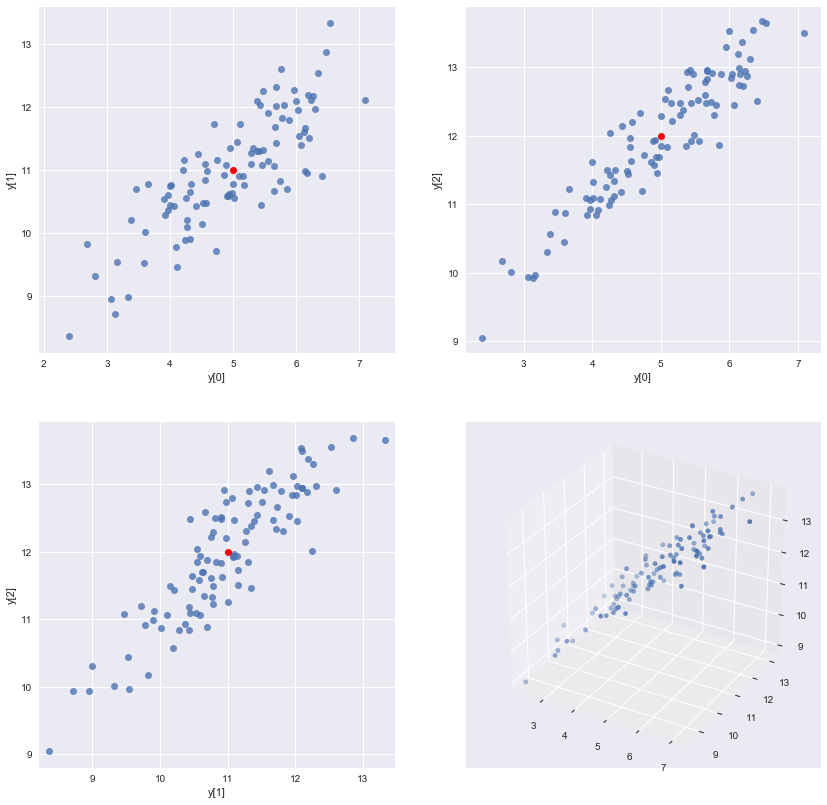

In [20]:
num_samples = 100

# The mean values of the three dimensions .
mu = np.array([5, 11, 12])

# The desired covariance matrix.
cov = np.array([
        [1.00, 0.85, 0.95],
        [0.85, 1.00, 0.90],
        [0.95, 0.90, 1.00]
    ])

# Generate the random samples.
df = np.random.multivariate_normal(mu, cov, size=num_samples)

# Plot various projections of the samples.
fig = plt.figure(figsize=(14, 14))

# First subplot
ax = fig.add_subplot(2, 2, 1)
#ax.plot(df[:,0], df[:,1], 'b.',c =(44/255, 160/255, 44/255))
sns.regplot(df[:,0], df[:,1], fit_reg=False)
ax.plot(mu[0], mu[1], 'ro')
plt.xlabel('y[0]')
plt.ylabel('y[1]')
plt.axis('equal')

# Second subplot
ax = fig.add_subplot(2, 2, 2)
#ax.plot(df[:,0], df[:,2], 'b.')
sns.regplot(df[:,0], df[:,2], fit_reg=False)
ax.plot(mu[0], mu[2], 'ro')
plt.xlabel('y[0]')
plt.ylabel('y[2]')
plt.axis('equal')

# Third subplot
ax = fig.add_subplot(2, 2, 3)
#ax.plot(df[:,1], df[:,2], 'b.')
sns.regplot(df[:,1], df[:,2], fit_reg=False)
ax.plot(mu[1], mu[2], 'ro')
plt.xlabel('y[1]')
plt.ylabel('y[2]')
plt.axis('equal')

# Fourth subplot
ax = fig.add_subplot(2, 2, 4, projection= "3d")
ax.scatter(df[:,0], df[:,1], df[:,2])
ax.axis('equal')
plt.show()

In [21]:
y = df[:,2]
X = np.delete(df, 2, 1)

In [22]:
# create vector of ones...
I = np.ones(shape=y.shape)[..., None]

#...and add to feature matrix
X = np.concatenate((I, X), 1)
print(X[0:5])

[[ 1.          4.58145264 10.98376923]
 [ 1.          5.95738812 12.26031588]
 [ 1.          4.56880514 10.46921756]
 [ 1.          6.3453342  12.53114751]
 [ 1.          5.14757274 10.90459977]]


In [23]:
# calculate coefficients using closed-form solution
coeffs = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
print(coeffs)

[4.58358305 0.60638394 0.39798997]


In [24]:
yhat = X.dot(coeffs)

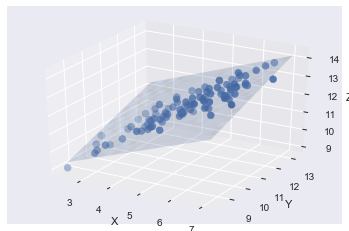

In [25]:
# regular grid covering the domain of the data
X = X[:,1:]
mn = np.min(X, axis=0)
mx = np.max(X, axis=0)
X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))
# evaluate it on grid
Z = coeffs[1]*X + coeffs[2]*Y + coeffs[0]
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(df[:,0], df[:,1], df[:,2], s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
plt.show()

In [30]:
SSE = sum((y-yhat)**2)
print(SSE)

7.334481622361918


In [34]:
TSS = sum((y-y.mean())**2)
print(TSS)

91.97595019364105


In [37]:
R_Squared = 1.0 - (SSE /TSS)
print(R_Squared)

0.9202565278540715


In [38]:
#1-(1-R2)*N-1/N-M-1
Adj_R2 = 1.0 - (1.0 - R_Squared) * 99/97
Adj_R2

0.9186123325520936

## Asumptions

In order for a linear model to work as expected there are a number of assumptions that is adviced to take into account. 


- *Weak exogeneity*. This essentially means that the predictor variables x can be treated as fixed values, rather than random variables. This also implies that the predictor variables are assumed to be error-free—that is, not contaminated with measurement errors. 
- Linearity. This means that the mean of the response variable is a linear combination of the parameters (regression coefficients) and the predictor variables. (Note that $y = \theta_0 + x_1\theta_1+ x_2^2\theta_2$ doesnt violate this assumption even though it has a polynomial)
- Constant variance (a.k.a. homoscedasticity). This means that different values of the response variable have the same variance in their errors, regardless of the values of the predictor variables.*
- Independence of errors. This assumes that the errors of the response variables are uncorrelated with each other. (Actual statistical independence is a stronger condition than mere lack of correlation and is often not needed, although it can be exploited if it is known to hold.) *